In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
%matplotlib inline

In [2]:
#Read data to DataFrame
df = pd.read_json('currencies.json')

In [3]:
#Let's get a sense of the data
df.head()

,date,day_close,day_high,day_low,day_market_cap,day_open,day_volume,long_name,market_rank,short_name
0,2019-04-09,0.358662,0.368276,0.341337,"210,789,830",0.349616,"25,531,764",0x,#38,(ZRX)
1,2019-04-08,0.349616,0.368514,0.338603,"205,422,221",0.356285,"25,068,719",0x,#38,(ZRX)
2,2019-04-09,0.000049,0.000049,0.000037,"1,296,018",0.000042,225,Elite,#1262,(1337)
3,2019-04-07,0.356219,0.368567,0.350586,"209,301,552",0.353494,"28,228,595",0x,#38,(ZRX)
4,2019-04-08,0.000042,0.000046,0.000039,"1,108,819",0.000043,162,Elite,#1262,(1337)


In [4]:
#DataFrame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667421 entries, 0 to 667420
Data columns (total 10 columns):
date              667421 non-null datetime64[ns]
day_close         667421 non-null object
day_high          667421 non-null object
day_low           667421 non-null object
day_market_cap    667421 non-null object
day_open          667421 non-null object
day_volume        667421 non-null object
long_name         667421 non-null object
market_rank       667421 non-null object
short_name        667421 non-null object
dtypes: datetime64[ns](1), object(9)
memory usage: 50.9+ MB


In [5]:
#Clean market rank variable
df['market_rank'] = (
df['market_rank']
    .str.replace('#','')
    .astype(int)
)

#Clean short name variable
df['short_name'] = (
df['short_name']
    .str.replace('(','')
    .str.replace(')','')
)

#Clean day close variable
df['day_close'] =  (
df['day_close']
    .str.replace(',','')
    .astype(float)
)
#Check results
df.head()

,date,day_close,day_high,day_low,day_market_cap,day_open,day_volume,long_name,market_rank,short_name
0,2019-04-09,0.358662,0.368276,0.341337,"210,789,830",0.349616,"25,531,764",0x,38,ZRX
1,2019-04-08,0.349616,0.368514,0.338603,"205,422,221",0.356285,"25,068,719",0x,38,ZRX
2,2019-04-09,0.000049,0.000049,0.000037,"1,296,018",0.000042,225,Elite,1262,1337
3,2019-04-07,0.356219,0.368567,0.350586,"209,301,552",0.353494,"28,228,595",0x,38,ZRX
4,2019-04-08,0.000042,0.000046,0.000039,"1,108,819",0.000043,162,Elite,1262,1337


In [6]:
#Sort DataFrame
df.sort_values(['market_rank', 'date'], ascending = [True, True], inplace = True)
df.head()

,date,day_close,day_high,day_low,day_market_cap,day_open,day_volume,long_name,market_rank,short_name
94333,2013-04-28,134.21,135.98,132.10,"1,488,566,728",135.30,-,Bitcoin,1,BTC
94327,2013-04-29,144.54,147.49,134.00,"1,603,768,865",134.44,-,Bitcoin,1,BTC
94321,2013-04-30,139.00,146.93,134.05,"1,542,813,125",144.00,-,Bitcoin,1,BTC
94315,2013-05-01,116.99,139.89,107.72,"1,298,954,594",139.00,-,Bitcoin,1,BTC
94309,2013-05-02,105.21,125.60,92.28,"1,168,517,495",116.38,-,Bitcoin,1,BTC


In [7]:
#Create Bitcoin and Ethereum series'
BTC = (
df
    .loc[df['short_name'] == 'BTC']
    .set_index('date')
    .loc[:,'day_close']
)
ETH = (
df
    .loc[df['short_name'] == 'ETH']
    .set_index('date')
    .loc[:,'day_close']
)
print(BTC.head())
print(ETH.head())

date
2013-04-28    134.21
2013-04-29    144.54
2013-04-30    139.00
2013-05-01    116.99
2013-05-02    105.21
Name: day_close, dtype: float64
date
2015-08-07    2.770000
2015-08-08    0.753325
2015-08-09    0.701897
2015-08-10    0.708448
2015-08-11    1.070000
Name: day_close, dtype: float64


In [8]:
#First order autogregression model at day level
BTC_day_model = ARMA(BTC, order = (1,0))
BTC_day_results = BTC_day_model.fit()
print(BTC_day_results.summary())

D:\Users\Alex\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Users\Alex\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                              ARMA Model Results                              
Dep. Variable:              day_close   No. Observations:                 2173
Model:                     ARMA(1, 0)   Log Likelihood              -14906.182
Method:                       css-mle   S.D. of innovations            230.343
Date:                Sun, 14 Apr 2019   AIC                          29818.365
Time:                        20:50:49   BIC                          29835.416
Sample:                    04-28-2013   HQIC                         29824.599
                         - 04-09-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2382.2208   1676.989      1.421      0.156    -904.616    5669.058
ar.L1.day_close     0.9975      0.001    732.158      0.000       0.995       1.000
                                

AttributeError: module 'matplotlib' has no attribute 'show'

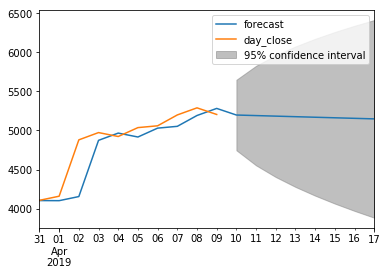

In [17]:
#Forcast Bitcoin at day level
BTC_day_results.plot_predict(start = 2163, end = 2180)
plt.show()

In [ ]:
#Autoregress Bitcoin at week level

In [ ]:
#Autoregress Bitcoin at month level

In [ ]:
#